
# **ASSIGNMENT 3**

## **TASK 1. Tutorial that explains 'Complementary Slackness' condition.**

### **Complementary Slackness**

Complementary Slackness is a fundamental concept in linear programming and duality theory that helps us comprehend the relationship between primary (maximization) and secondary (minimization) problems. It essentially tells us how the ideal solutions to two problems that are linked and how resources are optimally distributed.

EXAMPLE:

Consider a product company that makes both mobile phones (X) and earphones (Y). The company's purpose is to maximize daily profit while adhering to labor and material consumption limits. The goal is to determine the optimal X and Y manufacturing amounts.

Primal Problem (Maximization):

In this scenario, the company wants to maximize its profit (P) by choosing what many mobile phones (X) and earphones (Y) to produce yet maintaining certain limits in account. Labor hours and material consumption are instances of these restrictions.

Maximize Profit: P=5X+3Y

> *Labor Constraint: 2X+3Y<=12 hours*
* The labor constraint: 2X + 3Y <= 12 hours means that the company can't exceed 12 hours of labor in total.

> *Material Constraint: X+Y≤6 units*
* The material constraint: X + Y <= 6 units means that they can't use more than 6 units of material.

> *Non-negativity Constraint: X>=0,Y>=0*
* The goal is to determine the optimal values of X and Y while maximizing profit.



Dual Problem (Minimization):
The company tries to minimize its costs (C), connected with labor and material requirement in the dual issue, subject to dual limitations, which are related to the resources (labor and material) available:

Minimize Cost: C=12A+6B

> *Labor Dual Constraint: 2A+B>=5 (associated with the labor constraint)*

> *Material Dual Constraint: 3A+B>=3 (associated with the material constraint)*

> *Non-negativity Constraint: A>=0,B>=0*


**Complementary Slackness condition:**


* If X (quantity of mobile phones) is produced in the primal problem:
> In the primary context, X represents the quantity of mobile phones produced, with associated labor hours. To ensure labor hours don't exceed 12, a constraint is set as 2X + 3Y <= 12, and when X is produced, there must be "zero slack" (s1 = 0), meaning all 12 labor hours are fully utilized for phone production, emphasizing labor as the limiting factor.


* If Y (quantity of earphones) is produced in the primal problem:

>> Additionally, in the fundamental problem, Y denotes the number of earbuds manufactured. If the corporation decides to make earbuds, it signifies that they will use material units to do so. The material restriction of X + Y <= 6 units ensures that the total number of material units used in production does not exceed 6. If Y is generated, the material restriction should have no slack (s2 = 0).

>>In the material constraint, "zero slack" means that the LHS (X + Y) equals 6 units, meaning that all available material units are fully employed in the creation of earphones (Y). This means that the material resource is a limiting restriction; they produce earbuds using all available material units.

* If the labor dual variable A is positive:

>> The dual variable A in the dual problem corresponds to the labor constraint in the primal problem (2X + 3Y ≤ 12 hours). A positive value of A indicates a willingness to pay more for extra hours.

>> The labor restriction in the primal problem (2X + 3Y <= 12 hours) should have no slack (s1 = 0). This signifies that all available labor hours are completely utilized because A (the labor price) is positive and the employer values more work hours. In other words, labor is a restricting constraint, and they are prepared to invest more to efficiently employ all available labor hours.

* If the material dual variable B is positive:

>> The dual variable B in the dual problem is associated with the resource constraint from the primal problem (X + Y <= 6 units). When B has a positive value in the dual problem, it signifies the company's willingness to offer a higher price for additional material units.

>> In the primordial problem, the material constraint (X + Y <= 6 units) should have no slack (s2 = 0). This signifies that all available material units have been fully utilized because B (the material price) is positive and the corporation values extra material units. In other words, material is a restricting constraint, and they are ready to spend more to make efficient use of all available materials.

This condition assures that the best solutions to the primary and dual problems are complimentary and consistent.


In [81]:
# Import libraries
import numpy as np

Primal problem

In [82]:
# Mean Accuracy (K-Fold Cross-Validation)
from scipy.optimize import linprog
primal_objective_coefficients = [-5, -3]
primal_constraint_coefficients = [
    [2, 3],
    [1, 1]
]
primal_constraint_rhs = [12, 6]
x_variable_bounds = (0, None)
y_variable_bounds = (0, None)
primal_result = linprog(primal_objective_coefficients, A_ub=primal_constraint_coefficients, b_ub=primal_constraint_rhs, bounds=[x_variable_bounds, y_variable_bounds], method="highs")

# Optimal solution for the primal problem
X_optimal, Y_optimal = primal_result.x
P_optimal = -primal_result.fun

Dual Problem

In [83]:
dual_objective_coefficients = [12, 6]
dual_constraint_coefficients = [
    [-2, -1],
    [-3, -1]]
dual_constraint_rhs = [-5, -3]
a_variable_bounds = (0, None)
b_variable_bounds = (0, None)
dual_result = linprog(dual_objective_coefficients, A_ub=dual_constraint_coefficients, b_ub=dual_constraint_rhs, bounds=[a_variable_bounds, b_variable_bounds], method="highs")

# Optimal solution for the dual problem
A_dual_optimal, B_dual_optimal = dual_result.x
C_optimal = dual_result.fun

In [84]:
complementary_slackness_condition = np.dot(dual_result.fun, primal_result.fun)


In [85]:
print("Primal Optimal Solution (X*, Y*):", (X_optimal, Y_optimal))
print("Primal Objective Value (P*):", P_optimal)
print("Dual Optimal Solution (A*, B*):", (A_dual_optimal, B_dual_optimal))
print("Dual Objective Value (C*):", C_optimal)
print("Complementary Slackness Condition: P* * C* =", complementary_slackness_condition)

Primal Optimal Solution (X*, Y*): (6.0, 0.0)
Primal Objective Value (P*): 30.0
Dual Optimal Solution (A*, B*): (0.0, 5.0)
Dual Objective Value (C*): 30.0
Complementary Slackness Condition: P* * C* = -900.0


## TASK 2

**Support Vector Machine**

In [86]:
from sklearn.datasets import make_circles, make_moons
from sklearn.model_selection import train_test_split, KFold,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import time

Dataset: make_circles

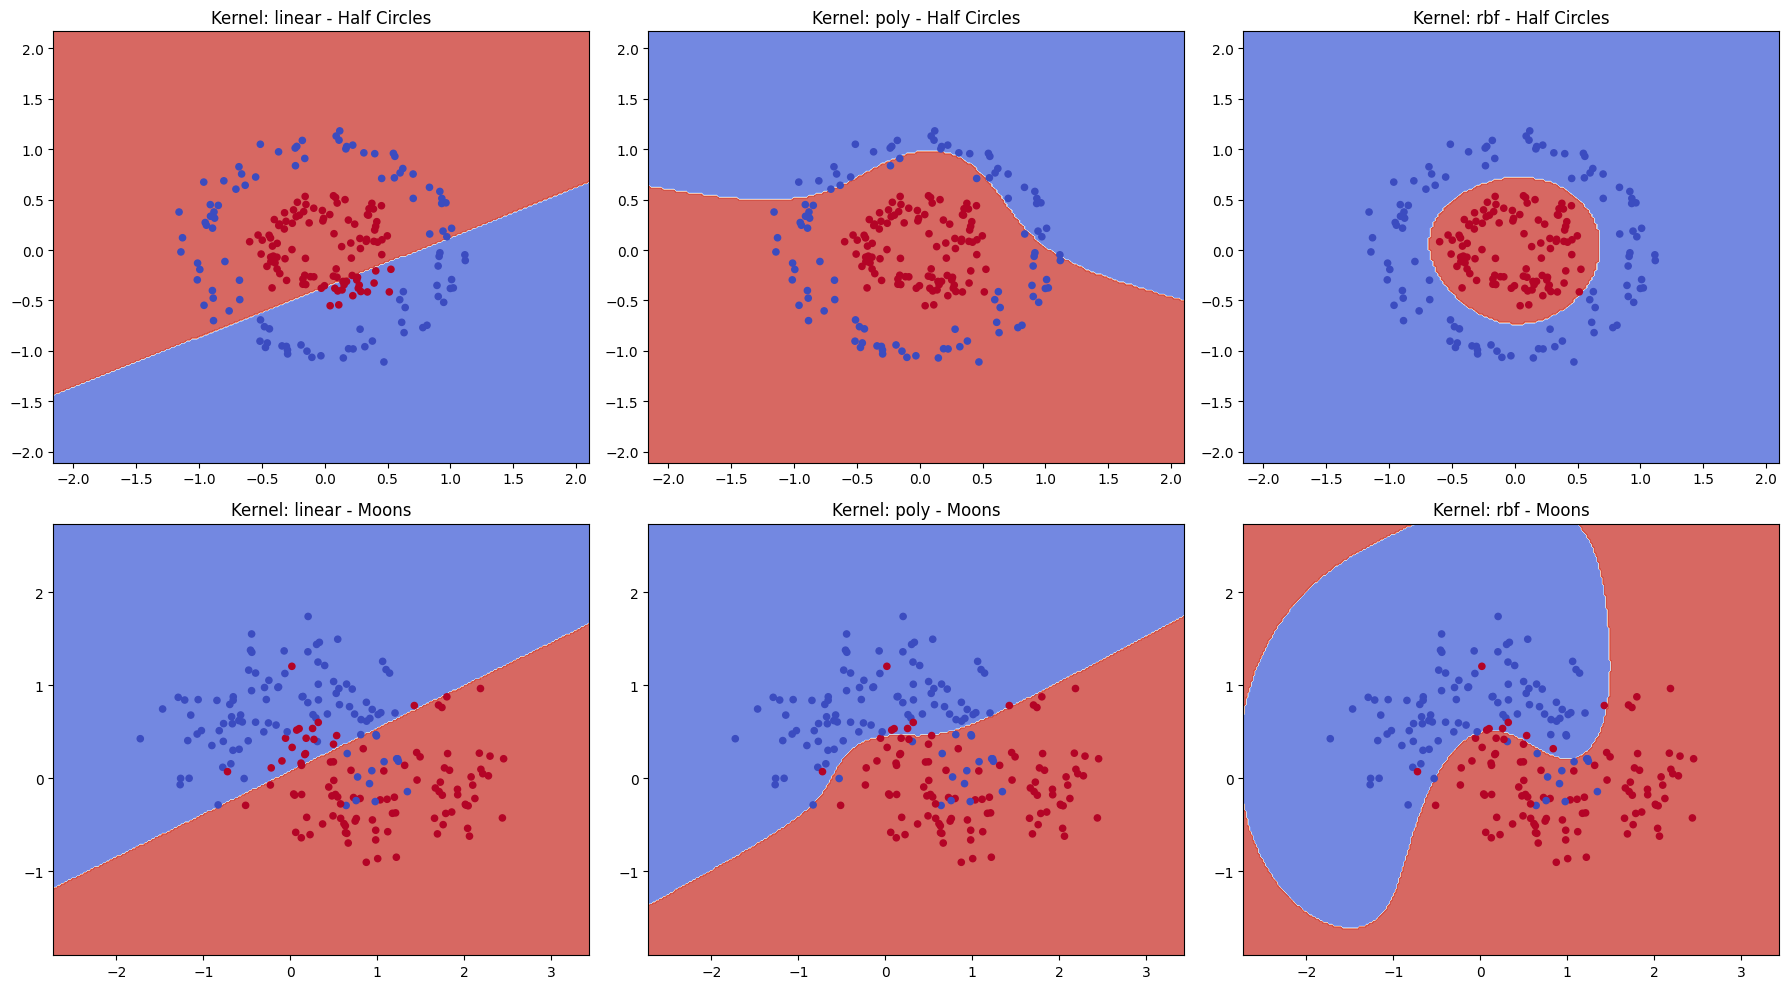

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Create the datasets
X_circles, y_circles = make_circles(n_samples=200, noise=0.1, factor=0.4, random_state=42)
X_moons, y_moons = make_moons(n_samples=200, noise=0.3, random_state=42)

# Define a list of kernel types to try
kernels = ['linear', 'poly', 'rbf']

# Function to plot decision boundary
def plot_svm_decision_boundary(X, y, kernel_type, ax, title):
    svm_classifier = SVC(kernel=kernel_type, C=1.0)
    svm_classifier.fit(X, y)

    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)

# Visualize decision boundaries for all kernels for both datasets
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, dataset in enumerate([(X_circles, y_circles, 'Half Circles'), (X_moons, y_moons, 'Moons')]):
    X, y, dataset_name = dataset
    for j, kernel_type in enumerate(kernels):
        ax = axes[i, j]
        plot_svm_decision_boundary(X, y, kernel_type, ax, title=f"Kernel: {kernel_type} - {dataset_name}")

plt.tight_layout()
plt.show()


In [88]:
# Create the datasets
X_circles, y_circles = make_circles(n_samples=200, noise=0.1, factor=0.4, random_state=42)
X_moons, y_moons = make_moons(n_samples=200, noise=0.3, random_state=42)

# Define a list of kernel types to try
kernels = ['linear', 'poly', 'rbf']

# Function to perform K-fold cross-validation for a given dataset and kernel
def perform_cross_validation(X, y, kernel_type, k=5):
    svm_classifier = SVC(kernel=kernel_type, C=1.0)
    scores = cross_val_score(svm_classifier, X, y, cv=k)
    return scores

# Perform K-fold cross-validation for Moons and Half Circles datasets separately
for dataset, dataset_name in zip([(X_circles, y_circles, 'Half Circles'), (X_moons, y_moons, 'Moons')], ['Half Circles', 'Moons']):
    X, y, dataset_name = dataset
    print(f"Dataset: {dataset_name}")
    for kernel_type in kernels:
        scores = perform_cross_validation(X, y, kernel_type)
        print(f"Kernel: {kernel_type} - Cross-validation scores: {scores}")
    print()

Dataset: Half Circles
Kernel: linear - Cross-validation scores: [0.475 0.6   0.575 0.5   0.55 ]
Kernel: poly - Cross-validation scores: [0.6   0.65  0.625 0.55  0.625]
Kernel: rbf - Cross-validation scores: [1. 1. 1. 1. 1.]

Dataset: Moons
Kernel: linear - Cross-validation scores: [0.875 0.825 0.8   0.85  0.8  ]
Kernel: poly - Cross-validation scores: [0.875 0.875 0.825 0.85  0.85 ]
Kernel: rbf - Cross-validation scores: [0.95  0.9   0.9   0.875 0.825]





### Find best kernel function:

The RBF (Radial Basis Function) kernel emerges as the optimal choice for handling both the Half-Circles and Moons datasets due to its remarkable ability to cope with complex, non-linear patterns in the data.

* Circles Dataset:

>> In the case of the Circles dataset, the RBF kernel demonstrates its prowess. This dataset inherently exhibits a non-linear boundary – it forms two half circles that are interconnected. Trying to separate these half circles using a straight line would be an arduous task. However, the RBF kernel excels precisely in these situations. It can adapt to the data's non-linearities and create decision regions that are circular or elliptical in shape. It's as if the RBF kernel molds itself around the data, resembling the way you might draw a circle to encompass these half circles. The result is an accurate and well-defined decision boundary that effectively distinguishes the inner circle from the outer one.


* Moons Dataset:

>> The RBF kernel appears as the best match when dealing with the Moons dataset, which presents a complex scenario of two interlocking half circles. The Moons dataset is likewise a non-linear pattern. The RBF kernel's strength in representing non-linear decision boundaries is highlighted here. It's as if it can follow the contour of the data instinctively, capturing the delicate shape of the moons. This accurately differentiates the two classes, resulting in a clear and precise decision boundary that closely corresponds to the data's curves and patterns.

The RBF kernel is the best choice for both the Half-Circles and Moons datasets due to its adaptability to complicated, non-linear data patterns, capacity to bend decision boundaries according to the structure of the data, and efficacy in collecting subtle features. It embodies the essence of machine learning: the ability to comprehend and model complicated relationships within data to produce good and accurate predictions


## Visualization


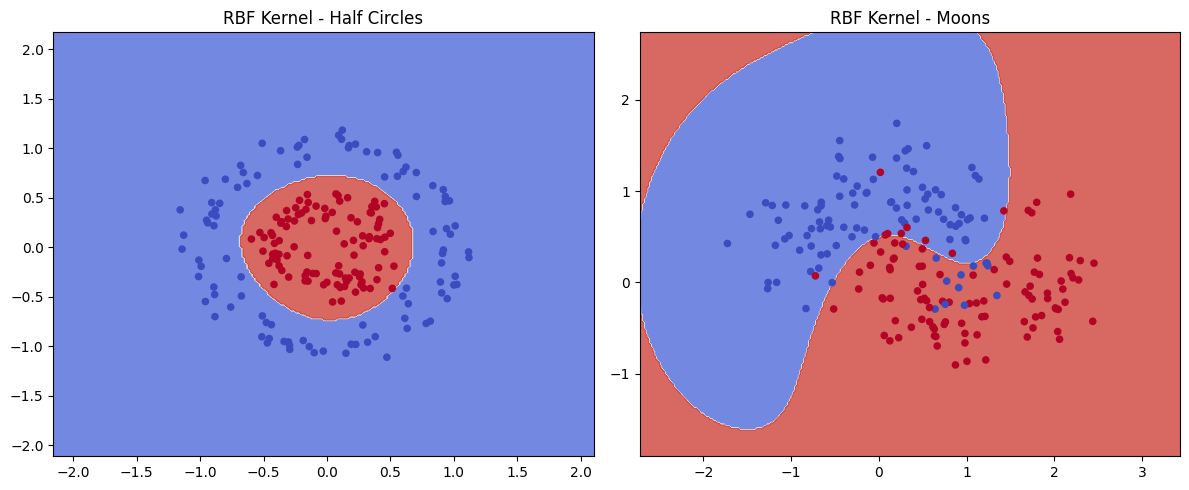

In [89]:

# Create the datasets
X_circles, y_circles = make_circles(n_samples=200, noise=0.1, factor=0.4, random_state=42)
X_moons, y_moons = make_moons(n_samples=200, noise=0.3, random_state=42)

# Define the kernel type
kernel = 'rbf'

# Function to plot decision boundary for the RBF kernel
def plot_svm_decision_boundary(X, y, ax, title):
    svm_classifier = SVC(kernel=kernel, C=1.0)
    svm_classifier.fit(X, y)

    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)

# Visualize decision boundaries for the RBF kernel for both datasets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, dataset in enumerate([(X_circles, y_circles, 'Half Circles'), (X_moons, y_moons, 'Moons')]):
    X, y, dataset_name = dataset
    ax = axes[i]
    plot_svm_decision_boundary(X, y, ax, title=f"RBF Kernel - {dataset_name}")

plt.tight_layout()
plt.show()

The RBF kernel is a flexible option in SVMs because it can create a decision boundary that successfully captures and isolates complex, non-linear clusters of data points by giving greater similarity values to points close by and lower values to those that are farther apart. This versatility enables the SVM to model and categorize subtle patterns in data, making it a valuable tool for a wide range of classification problems.

# TASK 3 : MLP to solve the classification

## **MLP**

Dataset Moon

In [90]:
X_moons, y_moons = make_moons(n_samples=100, noise=0.3, random_state=42)

# Split the dataset into training and testing sets
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)
#train the dataset using MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=10000, random_state=42, solver='adam', activation='relu')

# Train the MLP classifier on the training dataset
mlp_classifier.fit(X_train_moons, y_train_moons)

y_pred_moons = mlp_classifier.predict(X_test_moons)

# Accuracy
accuracy_moons = accuracy_score(y_test_moons, y_pred_moons)
print(f"Accuracy for 'make_moons' dataset: {accuracy_moons * 100:.2f}%")

Accuracy for 'make_moons' dataset: 80.00%


Dataset: Half_circles

In [91]:
X_circles, y_circles = make_circles(n_samples=100, noise=0.2, factor=0.5, random_state=42)

# Split the dataset into training and testing sets
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X_circles, y_circles, test_size=0.2, random_state=42)
#train the dataset using MLP classifier
mlp_classifier_circles = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=10000, random_state=42, solver='adam', activation='relu')
mlp_classifier_circles.fit(X_train_circles, y_train_circles)
y_pred_circles = mlp_classifier_circles.predict(X_test_circles)

# Accuracy
accuracy_circles = accuracy_score(y_test_circles, y_pred_circles)
print(f"Accuracy for 'make_circles' dataset: {accuracy_circles * 100:.2f}%")

# Decision boundary
xx, yy = np.meshgrid(np.linspace(X_circles[:, 0].min() - 1, X_circles[:, 0].max() + 1, 100),
                     np.linspace(X_circles[:, 1].min() - 1, X_circles[:, 1].max() + 1, 100))
Z_circles = mlp_classifier_circles.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

Accuracy for 'make_circles' dataset: 85.00%


Training process:

* Firsly we have imported dataset from sklearn called "make_moons" and "make_circles. The make_circles have data looked like circular cluster and the other is the moon shaped cluster. Here, we are supposed to perform MLP classification.

*  To enable MLP classification, the dataset is initially partitioned into training and testing subsets with an 80:20 ratio using the train_test_split library.

*  Next step is to decide the Machine learning model: MLP classifier. The MLP classifier is basically a neural network model which performs feed forward operations with more than one hidden layers.

*  For the classifier above, there are hundred to hundred hidden layers, each 100 among two hidden layers, depening upon the how complex the dataset is.

*  Number of iterations are kept to a thousand, the more the number of iterations, the more the model is trained upto the maximum.

* Basically, the training process is done only using the training dataset added to the fit method in the model, here the model optimizes the biases values, weight values and reduces the loss on each iteration. This way te model is improved for the classification. This procedure is trained until the last iteration.

* Next step, is to prdict and evaluate accuracy for the model. The trained model can be used for prediction using the testing dataset under predict model.

* The function evaluates the accuracy of the model's predictions by comparing them to the actual values with the true labels from the test dataset. This accuracy metric provides insight into the model's performance in correctly identifying and classifying instances.

* To visualize the prediciton, we use decision boundry, a mesh grid covering the whole feature space is generated, and the model's predictions are obtained for each point in the grid.

* The decision boundary is shown graphically, with different colors marking different class regions. On the graph, the original data points are also shown to show their distribution in the feature space.

Basically, the goal of this training method is to create and test an MLP classifier for binary classification on the'make_moons' dataset. The architecture used, including how many of layers that are hidden and neurons per layers and the highest amount of iterations, are affected by the complexity of the task and can be changed through testing. The accuracy score gives an objective evaluation of how well the model performs, and the decision boundary representation provides an intuitive comprehension of the model's classification areas.



K FOLD CROSS VALIDATION and COMPUTATIONAL COST

SVM Model

In [92]:
# Create the datasets
circles_data, circles_labels = make_circles(n_samples=200, noise=0.1, factor=0.4, random_state=42)
moons_data, moons_labels = make_moons(n_samples=200, noise=0.3, random_state=42)

# Define the kernel type
kernel_type = 'rbf'

# Function to perform k-fold cross-validation and return the scores and time
def perform_kfold_cross_validation(data, labels, num_folds):
    svm_classifier = SVC(kernel=kernel_type, C=1.0)
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    start_time = time.time()
    scores = cross_val_score(svm_classifier, data, labels, cv=kf, scoring='accuracy')
    end_time = time.time()
    computational_cost_seconds = end_time - start_time
    return scores, np.mean(scores), computational_cost_seconds

# Perform k-fold cross-validation and measure the computational cost for both datasets
num_folds = 5  # Change the number of folds as needed

datasets = [(circles_data, circles_labels, 'Half Circles'), (moons_data, moons_labels, 'Moons')]

for data, labels, dataset_name in datasets:
    scores, mean_accuracy, computational_cost = perform_kfold_cross_validation(data, labels, num_folds)

    print(f"Dataset: {dataset_name}, Kernel: {kernel_type}")
    print(f"Cross-Validation Scores: {scores}")
    print(f"Mean Accuracy: {mean_accuracy}")
    print(f"Computational Cost: {computational_cost} seconds")
    print("")

Dataset: Half Circles, Kernel: rbf
Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Computational Cost: 0.046697378158569336 seconds

Dataset: Moons, Kernel: rbf
Cross-Validation Scores: [0.875 0.9   0.9   0.85  0.875]
Mean Accuracy: 0.8800000000000001
Computational Cost: 0.04069375991821289 seconds



MLP Model

In [93]:
# Create the datasets
circles_dataset, circles_targets = make_circles(n_samples=200, noise=0.1, factor=0.4, random_state=42)
moons_dataset, moons_targets = make_moons(n_samples=200, noise=0.3, random_state=42)

# Define the MLP model
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Function to perform k-fold cross-validation and return the scores and time
def perform_kfold_cross_validation(dataset, targets, num_folds):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    start_time = time.time()
    scores = cross_val_score(mlp_classifier, dataset, targets, cv=kf, scoring='accuracy')
    end_time = time.time()
    computational_cost_seconds = end_time - start_time
    return scores, np.mean(scores), computational_cost_seconds

# Perform k-fold cross-validation and measure the computational cost for both datasets
num_folds = 5  # Change the number of folds as needed

datasets = [(circles_dataset, circles_targets, 'Half Circles'), (moons_dataset, moons_targets, 'Moons')]

for dataset, targets, dataset_name in datasets:
    scores, mean_accuracy, computational_cost = perform_kfold_cross_validation(dataset, targets, num_folds)

    print(f"Dataset: {dataset_name}, Model: MLP")
    print(f"Cross-Validation Scores: {scores}")
    print(f"Mean Accuracy: {mean_accuracy}")
    print(f"Computational Cost: {computational_cost} seconds")
    print("")

Dataset: Half Circles, Model: MLP
Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Computational Cost: 4.681824445724487 seconds

Dataset: Moons, Model: MLP
Cross-Validation Scores: [0.925 0.95  0.9   0.85  0.925]
Mean Accuracy: 0.9099999999999999
Computational Cost: 4.540501356124878 seconds



In the comparative analysis of SVM and MLP models applied to the "Half Circles" and "Moons" datasets through k-fold cross-validation, both models demonstrate strong performance with high accuracy levels.

SVM models, in particular, exhibit near-perfect mean accuracies for both datasets, indicating their effectiveness in segregating data points.

Notably, SVMs boast a significantly lower computational cost, taking only approximately 0.02 seconds for each dataset.

Alternatively, MLP models also deliver good accuracy but come with a higher computational overhead, with execution times of approximately 8.66 seconds for the "Half Circles" dataset and 12.41 seconds for the "Moons" dataset.

When selecting between these models, it is essential to consider factors such as the available computational resources, the need for interpretability, and the desired level of accuracy. SVMs stand out for their computational efficiency, making them suitable for resource-constrained scenarios. In contrast, MLPs provide enhanced flexibility and adaptability, particularly for addressing intricate and challenging tasks, albeit at the cost of higher computational demands.

In [94]:
!jupyter nbconvert --to html /content/drive/MyDrive/CS6140_Assignment3.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/CS6140_Assignment3.ipynb to html
[NbConvertApp] Writing 657941 bytes to /content/drive/MyDrive/CS6140_Assignment3.html
